In [1]:
import matplotlib.pyplot as plt
import json

In [2]:
# Constants

NTHREADS = 20
MAX_N = 160_000

In [5]:
with open('data.json', 'r') as f:
    data = json.load(f)
with open('./cpu_param_times.json', 'r') as f:
    cpu_param_times = json.load(f)

cpu_dynamic = {key: entry["20"]["dynamic"] for key, entry in cpu_param_times.items()}
print(cpu_dynamic)

{'20000': 0.183615, '30000': 0.387231, '40000': 0.686564}


# Execution time comparison

In [ ]:
global_time_vec = [entry["Time (s)"] for entry in data["vec"]]
global_time_parallel = [entry["Time (s)"] for entry in data["parallel"]]
hotspot_time_vec = [entry["Hotspot"]["Time (s)"] for entry in data["vec"]]
hotspot_time_parallel = [entry["Hotspot"]
                         ["Time (s)"] for entry in data["parallel"]]

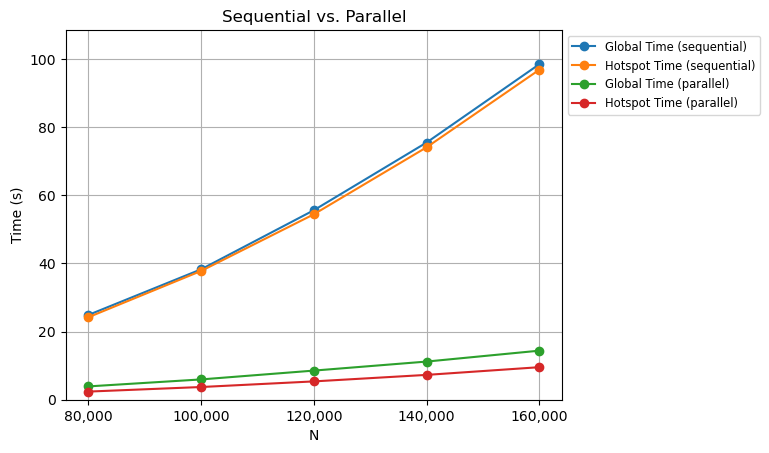

In [ ]:
plt.figure()
plt.plot([f"{entry['N']:,}" for entry in data["vec"]],
         global_time_vec, label="Global Time (sequential)", marker='o')
plt.plot([f"{entry['N']:,}" for entry in data["vec"]],
         hotspot_time_vec, label="Hotspot Time (sequential)", marker='o')
plt.plot([f"{entry['N']:,}" for entry in data["parallel"]],
         global_time_parallel, label="Global Time (parallel)", marker='o')
plt.plot([f"{entry['N']:,}" for entry in data["parallel"]],
         hotspot_time_parallel, label="Hotspot Time (parallel)", marker='o')
plt.xlabel("N")
plt.ylabel("Time (s)")
plt.ylim(0, max(global_time_vec + global_time_parallel) + 10)
plt.legend(loc="upper left", fontsize='small',
           title_fontsize='medium', bbox_to_anchor=(1, 1))
plt.title("Sequential vs. Parallel")
plt.grid(True)
plt.show()

# Speedup & efficiency

[6.37, 6.42, 6.51, 6.74, 6.84]


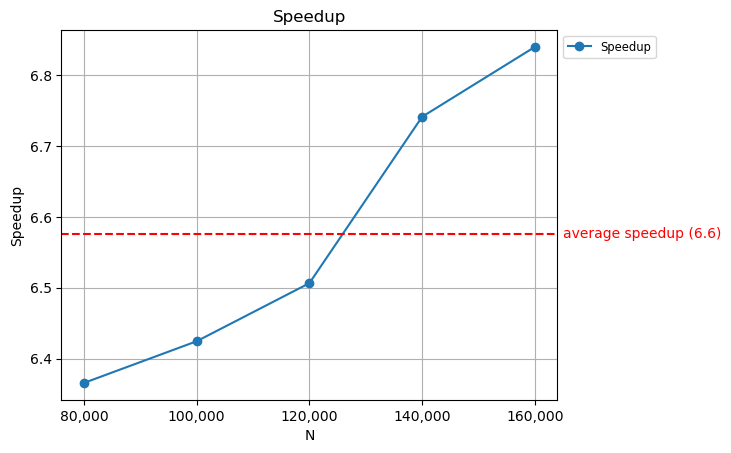

In [ ]:
speedup = [global_time_vec[i] / global_time_parallel[i]
           for i in range(len(global_time_vec))]
average_speedup = sum(speedup) / len(speedup)

plt.figure()
plt.plot([f"{entry['N']:,}" for entry in data["vec"]],
         speedup, label="Speedup", marker='o')
plt.axhline(y=average_speedup, color='r', linestyle='--')
plt.text(len(data["vec"]) - 0.75, average_speedup, f'average speedup ({average_speedup:.2})',
         color='r', va='center', ha='left', bbox=dict(facecolor='white', edgecolor='none', pad=0))
plt.xlabel("N")
plt.ylabel("Speedup")
plt.legend(loc="upper left", fontsize='small',
           title_fontsize='medium', bbox_to_anchor=(1, 1))
plt.title("Speedup")
plt.grid(True)
plt.show()

[0.32, 0.32, 0.33, 0.34, 0.34]


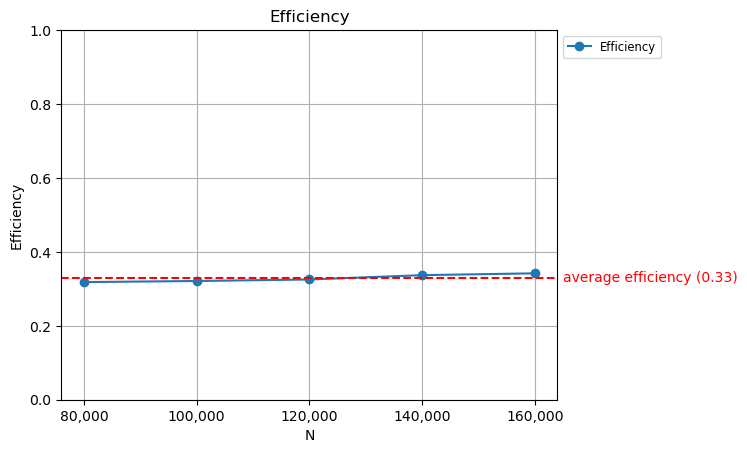

In [7]:
efficiency = [speedup[i] / NTHREADS for i in range(len(speedup))]
average_efficiency = average_speedup / NTHREADS

rounded_speedup = [round(s, 2) for s in efficiency]
print(rounded_speedup)

plt.figure()
plt.plot([f"{entry['N']:,}" for entry in data["vec"]],
         efficiency, label="Efficiency", marker='o')
plt.axhline(y=average_efficiency, color='r', linestyle='--')
plt.text(len(data["vec"]) - 0.75, average_efficiency,
         f'average efficiency ({average_efficiency:.2})', color='r', va='center', ha='left', bbox=dict(facecolor='white', edgecolor='none', pad=0))
plt.xlabel("N")
plt.ylabel("Efficiency")
plt.ylim(0, 1)
plt.legend(loc="upper left", fontsize='small',
           title_fontsize='medium', bbox_to_anchor=(1, 1))
plt.title("Efficiency")
plt.grid(True)
plt.show()